In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle
import pygenstability as pgs

from matplotlib.pyplot import figure
from pygenstability import plotting
from scipy.linalg import block_diag

from msfiltration import MCF

In [2]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/paper/figures/'
plt.rcParams.update({'font.size': 20})

# Apply MCF

In [3]:
partitions = [
    np.asarray([1, 2, 3]),
    np.asarray([1, 1, 2]),
    np.asarray([1, 2, 2]),
    np.asarray([1, 2, 1]),
    np.asarray([1, 1, 1]),
]
filtration_indices = np.asarray([1,2,3,4,5],dtype=int)

In [4]:
# initialise MCF object
mcf = MCF()
mcf.load_data(partitions,filtration_indices)

# build filtration and compute PH
mcf.build_filtration()
mcf.compute_persistence()

Constructing filtration with GUDHI ...


100%|██████████| 5/5 [00:00<00:00, 2089.84it/s]

Computing persistence with GUDHI ... 


In [5]:
plt.rcParams.update({'font.size': 20})

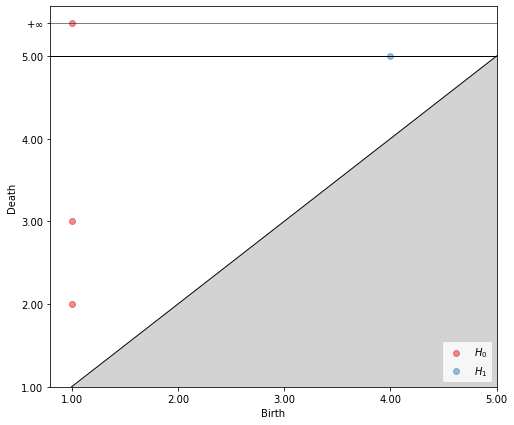

In [6]:
# Plot persistence diagram
ax = mcf.plot_persistence_diagram()
plt.savefig(root_fig +'toyexample_PD.pdf',bbox_inches='tight')

In [7]:
from msfiltration.measures import compute_persistent_hierarchy, compute_persistent_conflict, compute_beta_0, compute_partition_size, compute_birth_count, compute_death_count

In [8]:
n_partitions = len(partitions)
n_nodes = len(partitions[0])

betti_numbers = np.zeros((n_partitions,2))
for m in range((n_partitions)):
    betti_numbers[m] = mcf.filtration_gudhi.persistent_betti_numbers(filtration_indices[m],filtration_indices[m])


betti_0 = betti_numbers[:,0]
betti_1 = betti_numbers[:,1]

s_partitions = compute_partition_size(mcf)

h = betti_0/s_partitions

h_bar = np.mean(h[:-1])
print("Average persistent hierarchy:", np.around(h_bar,3))

total_1 = np.cumsum(compute_birth_count(mcf, 1))
resolved_1 = np.cumsum(compute_death_count(mcf, 1)[:-1])

b_1 = compute_birth_count(mcf, 1)
d_1 = compute_death_count(mcf, 1)[:-1]

c_1 = b_1 - d_1
c = c_1

Average persistent hierarchy: 0.75


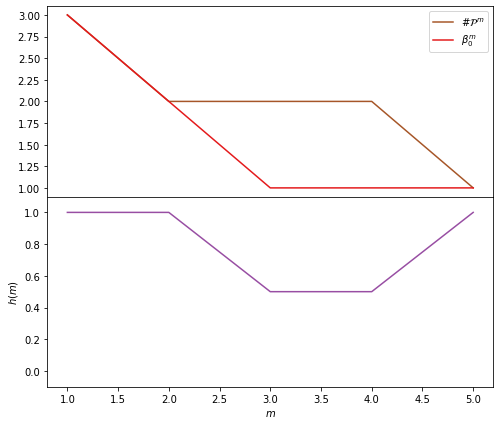

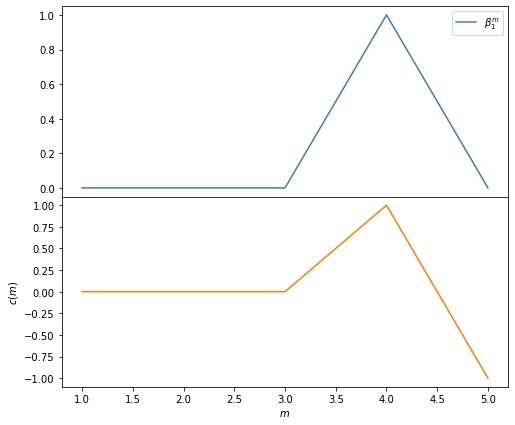

In [9]:
colormap = plt.cm.Set1.colors

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(filtration_indices,s_partitions, label = r'$\#\mathcal{P}^m$', color=colormap[6])
ax1.plot(filtration_indices,betti_numbers[:,0], label = r'$\beta_0^m$', color=colormap[0])
ax1.set(xticks=[])

ax1.legend()
ax2.plot(filtration_indices,h, label = r'$h(m)$',c=colormap[3])
ax2.set_ylabel(r'$h(m)$')
ax2.set(xlabel=r'$m$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'toyexample_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

import pandas as pd

def moving_average(x, w):
    return np.roll(
        np.asarray(pd.Series(x).rolling(window=w, win_type="triang").mean()),
        -int(w / 2),
    )

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(filtration_indices,betti_1, label = r'$\beta_1^m$', color=colormap[1])

ax1.set(xticks=[])

ax1.legend()
ax2.plot(filtration_indices,c,c=colormap[4])
ax2.set_ylabel(r'$c(m)$')#, color="green")
ax2.set(xlabel=r'$m$')#,ylim=(-0.1,1.1))
plt.savefig(root_fig +'toyexample_conflict.pdf', dpi=fig.dpi,bbox_inches='tight')